Это проект бота, который "запущен" на исторических данных и выдаёт: "BUY!!!" при определённых условиях (рост цены, сильное изменение (> 3 средних квадратических) объёма и стоимости). Далее будет улучшены условия с использованием волатильности и остальных атрибутов теории вероятностей.

Снизу приведён график, на котором указаны сигналы бота. Пока они только на открытиях, но у Apple основные объёмы по утрам. Далее будут рассмотренны другие акции.

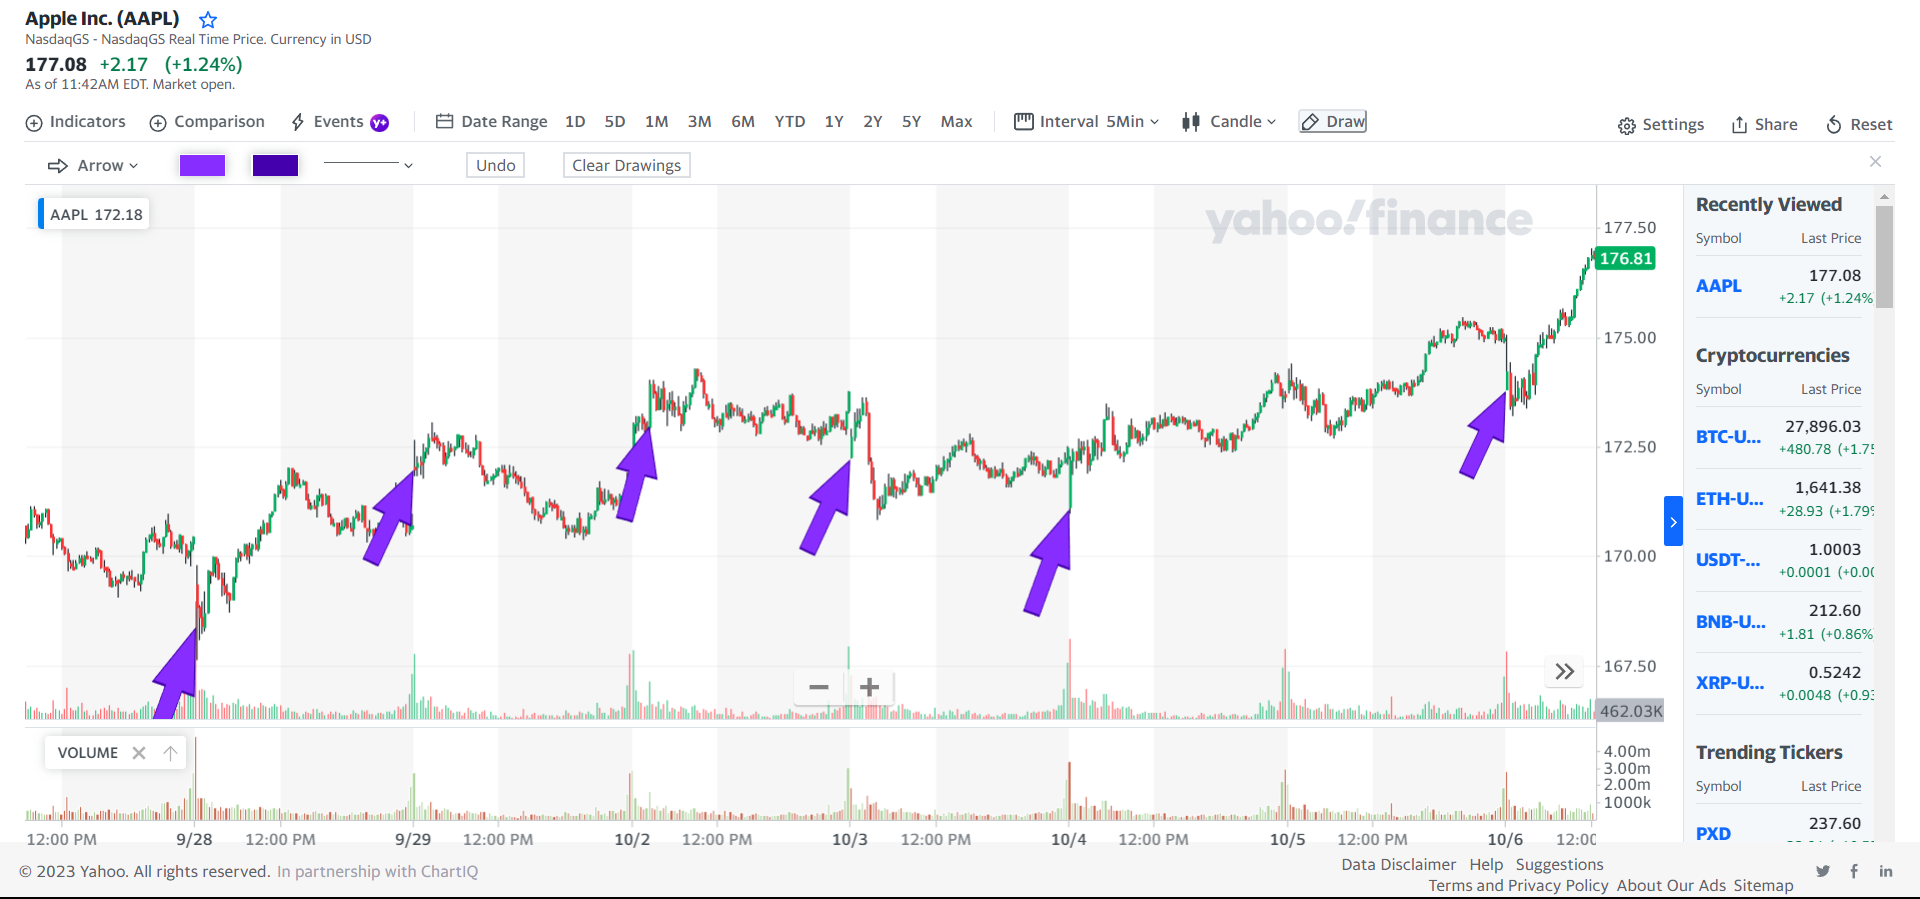

In [9]:
import yfinance as yf
import numpy as np
import datetime

# Символ акции (например, Apple - AAPL)
symbol = 'AAPL'

# Загрузка данных о ценах акции за последний год с интервалом 1 час
data = yf.download(symbol, period="7d", interval="1m")

# Переменные для хранения суммы и количества записей
total_spread = 0.0
total_volume = 0
count = 0
spread_values = []  # Список для хранения значений High-Low Spread
volume_values = []  # Список для хранения значений объема
previous_close = None  # Переменная для хранения предыдущей цены закрытия

# Вычисление и вывод среднего значения High-Low Spread и среднего объема по всем записям
for index, row in data.iterrows():
    volume = row['Volume']
    high_price = row['High']
    low_price = row['Low']
    spread = high_price - low_price

    spread_values.append(spread)
    volume_values.append(volume)
    total_spread += spread
    total_volume += volume
    count += 1

if count > 0:
    average_spread = total_spread / count
    print(f"Среднее High-Low Spread по всем записям: {average_spread}")

    # Вычисление среднего квадратичного отклонения для High-Low Spread
    std_deviation_spread = np.std(spread_values)
    print(f"Среднее квадратичное отклонение High-Low Spread: {std_deviation_spread}")

    average_volume = total_volume / count
    print(f"Средний объем по всем записям: {average_volume}")

    # Вычисление среднего квадратичного отклонения для объема
    std_deviation_volume = np.std(volume_values)
    print(f"Среднее квадратичное отклонение объема: {std_deviation_volume}")

else:
    print("Нет записей")

print()  # Пустая строка для разделения данных

for index, row in data.iterrows():
    timestamp = index.strftime("%Y-%m-%d %H:%M:%S")
    volume = row['Volume']
    high_price = row['High']
    low_price = row['Low']
    spread = high_price - low_price
    open_price = row['Open']  # Цена открытия
    close_price = row['Close']  # Цена закрытия

    if volume > average_volume + 3 * std_deviation_volume: #"Правило 3 сигм"
        print(f"Временная метка: {timestamp}")
        print(f"Volume: {volume}")
        print(f"High Price: {high_price}")
        print(f"Low Price: {low_price}")
        print(f"High-Low Spread: {spread}")
        print(f"Open Price: {open_price}")
        print(f"Close Price: {close_price}")
        print(f"Close - Open Price: {close_price - open_price}")

        if previous_close is not None:
            print(f"Previous Close: {previous_close}")
            print(f"Previous Close - Open Price: {previous_close - open_price}")

            if close_price - open_price > 0 and spread > average_spread + 3 * std_deviation_spread:
              print("BUY!!!")

        print()  # Пустая строка для разделения данных

    previous_close = close_price

[*********************100%%**********************]  1 of 1 completed
Среднее High-Low Spread по всем записям: 0.15356276643635164
Среднее квадратичное отклонение High-Low Spread: 0.0961507170174686
Средний объем по всем записям: 115331.68581616481
Среднее квадратичное отклонение объема: 132767.01804836164

Временная метка: 2023-09-28 09:30:00
Volume: 3258445.0
High Price: 169.8000030517578
Low Price: 167.6199951171875
High-Low Spread: 2.1800079345703125
Open Price: 169.33999633789062
Close Price: 168.0
Close - Open Price: -1.339996337890625

Временная метка: 2023-09-28 09:31:00
Volume: 531642.0
High Price: 168.66000366210938
Low Price: 167.92999267578125
High-Low Spread: 0.730010986328125
Open Price: 167.97999572753906
Close Price: 168.3300018310547
Close - Open Price: 0.350006103515625
Previous Close: 168.0
Previous Close - Open Price: 0.0200042724609375
BUY!!!

Временная метка: 2023-09-28 15:59:00
Volume: 952987.0
High Price: 170.8000030517578
Low Price: 170.57000732421875
High-Low S